In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [22]:
df = pd.read_csv('1000_Companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [24]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [25]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [26]:
df.isnull().mean() * 100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [27]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<Axes: >

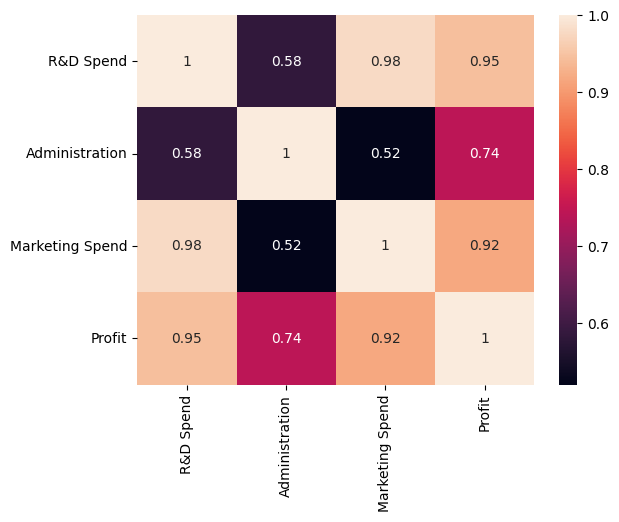

In [29]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Seperate the X and Y variable 

In [30]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [33]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Encoding the State Column

In [34]:
X['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ohe = OrdinalEncoder()

In [36]:
encoder = ohe.fit_transform(X[['State']])

In [37]:
X = X.drop(df[['State']],axis=1)

In [38]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [39]:
state = pd.DataFrame(encoder,columns=ohe.get_feature_names_out())

In [40]:
state.head()

,State
0,2.0
1,0.0
2,1.0
3,2.0
4,1.0


In [44]:
X = pd.concat([X,state],axis=1)

In [45]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2.0
1,162597.70,151377.59,443898.53,0.0
2,153441.51,101145.55,407934.54,1.0
3,144372.41,118671.85,383199.62,2.0
4,142107.34,91391.77,366168.42,1.0


## Perfoming Train test Split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=32 )

In [55]:
X_train.shape, X_test.shape

((800, 4), (200, 4))

In [56]:
ytrain.shape, ytest.shape

((800,), (200,))

## Feature Scaling using Standard Scaler

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [61]:
Xtrain_scaled = scaler.fit_transform(X_train)

In [62]:
Xtest_scaled = scaler.transform(X_test)

## Traning The Model

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [65]:
model.fit(Xtrain_scaled,ytrain)

LinearRegression()

In [66]:
model.intercept_

120149.89839997503

In [67]:
model.coef_

array([24993.04486117, 14478.02460395,  7402.35298636,   112.49082068])

In [69]:
y_pred = model.predict(Xtest_scaled)

In [79]:
y_pred[:9]

array([173317.20752647,  81836.53091819, 177573.4616626 , 122822.20453287,
        73103.66786561, 164100.72583433,  92834.70995392, 178764.12427262,
       127549.863388  ])

In [72]:
ytest

632    172769.31560
687     81824.87341
833    177000.62080
182    122570.30040
831     72870.19126
           ...     
258    102833.60680
118     73896.19520
279    112642.58030
458     68347.57275
301    160935.67150
Name: Profit, Length: 200, dtype: float64

## Model Perfomance 

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [74]:
mae = mean_squared_error(y_pred,ytest)
mse = mean_squared_error(y_pred,ytest)
rmse = np.sqrt(mse)

In [75]:
print(mae)
print(mse)
print(rmse)

37529371.169257626
37529371.169257626
6126.1220334937525


In [76]:
result = r2_score(y_pred,ytest)

In [78]:
result

0.9782928689171545